# Importation des bibliothèques

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare , Softmax 
from non_lineaire import  TanH , Sigmoide

from sequentiel import Sequentiel , Optim
from loss  import MSELoss , CELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Chargement des données USPS

In [3]:
uspsdatatrain = "./data/USPS_train.txt"
uspsdatatest = "./data/USPS_test.txt"
alltrainx,alltrainy = ut.load_usps(uspsdatatrain)
alltestx,alltesty = ut.load_usps(uspsdatatest)

alltrainy , alltesty = alltrainy.reshape(-1,1) , alltesty.reshape(-1,1)

print('Train_X :', alltrainx.shape)
print('Train_y :', alltrainy.shape)
print()
print('Test_X :', alltestx.shape)
print('Test_y :', alltesty.shape)

Train_X : (7291, 256)
Train_y : (7291, 1)

Test_X : (2007, 256)
Test_y : (2007, 1)


In [4]:
alltrainy[:3]

array([[6],
       [5],
       [4]])

In [4]:
alltrainy_onehot , alltesty_onehot = ut.one_hot(alltrainy) , ut.one_hot(alltesty)
print('Train_y_onehot :', alltrainy_onehot.shape)
print('Test_y_onehot :', alltesty_onehot.shape)

Train_y_onehot : (7291, 10)
Test_y_onehot : (2007, 10)


In [6]:
alltrainy_onehot[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### MSE

In [28]:
input_size = alltrainx.shape[1]
output_size = 10

module_1 = Module_lineare(input_size, 128 , True)
module_2 = Module_lineare(128, output_size,True)

tan = TanH()
softmax = Softmax()

loss = MSELoss()



network = Sequentiel([module_1,tan,module_2,softmax])


optimiser = Optim(network,loss,eps=1e-4)

losses_MSE = optimiser.SGD(alltrainx, alltrainy_onehot, 100, 100)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


In [29]:
y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

accuracy :  0.84853014449427


### CELoss

In [20]:
input_size = alltrainx.shape[1]
output_size = 10

module_1 = Module_lineare(input_size, 128 , True)
module_2 = Module_lineare(128, output_size,True)

tan = TanH()
softmax = Softmax()

loss = CELoss()



network = Sequentiel([module_1,tan,module_2,softmax])


optimiser = Optim(network,loss,eps=1e-2)

losses_CE_5 = optimiser.SGD(alltrainx, alltrainy_onehot, 100, 100)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)


y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
accuracy :

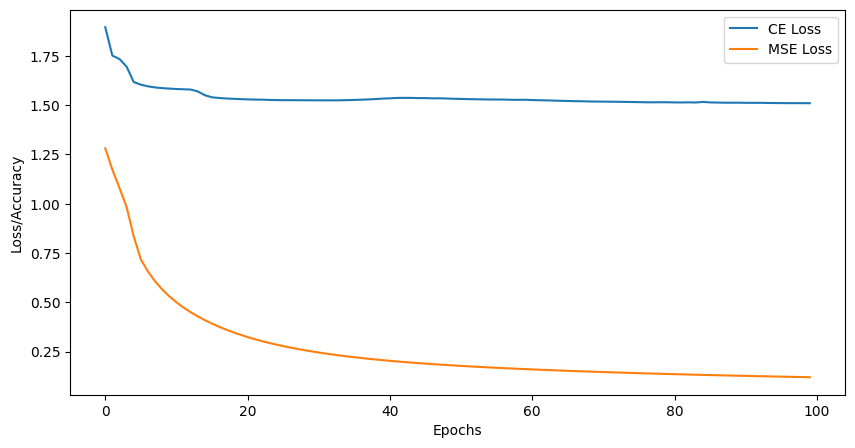

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(losses_CE_5, label='CE Loss')
plt.plot(losses_MSE, label='MSE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [10]:
input_size = alltrainx.shape[1]
output_size = 10
hidden_1 = 128
hidden_2 = 64

batch_size = 100
epochs = 500

module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, hidden_2,True)
module_3 = Module_lineare(hidden_2, output_size,True)

tan_1 = TanH()
tan_2 = TanH()
softmax = Softmax()

loss = CELoss()



network = Sequentiel([module_1,tan_1,module_2,tan_2 , module_3 , softmax])


optimiser = Optim(network,loss,eps=1e-3)

losses_500 = optimiser.SGD(alltrainx, alltrainy_onehot, batch_size, epochs)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)

y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
epoch  100

et le graphe suiavant représente l'évolution de la moyenne des losses lors de la phases d'apprentiqque pour chaque pas de gradient

In [14]:
input_size = alltrainx.shape[1]
output_size = 10
hidden_1 = 128
hidden_2 = 64

batch_size = 100
epochs = 1000

module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, hidden_2,True)
module_3 = Module_lineare(hidden_2, output_size,True)

tan_1 = TanH()
tan_2 = TanH()
softmax = Softmax()

loss = CELoss()



network = Sequentiel([module_1,tan_1,module_2,tan_2 , module_3 , softmax])


optimiser = Optim(network,loss,eps=1e-3)

losses_1000 = optimiser.SGD(alltrainx, alltrainy_onehot, batch_size, epochs)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)

y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

accuracy :  0.9014587643270076


## Variation du pas de gradient

In [7]:
input_size = alltrainx.shape[1]
output_size = 10

module_1 = Module_lineare(input_size, 128 , True)
module_2 = Module_lineare(128, output_size,True)

tan = TanH()
softmax = Softmax()

loss = CELoss()



network = Sequentiel([module_1,tan,module_2,softmax])


optimiser = Optim(network,loss,eps=1e-3)

losses_CE = optimiser.SGD(alltrainx, alltrainy_onehot, 100, 100)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)



epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


In [8]:
y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

accuracy :  0.8186347782760339


In [16]:
input_size = alltrainx.shape[1]
output_size = 10

module_1 = Module_lineare(input_size, 128 , True)
module_2 = Module_lineare(128, output_size,True)

tan = TanH()
softmax = Softmax()

loss = CELoss()



network = Sequentiel([module_1,tan,module_2,softmax])


optimiser = Optim(network,loss,eps=1e-1)

losses_CE_2 = optimiser.SGD(alltrainx, alltrainy_onehot, 100, 100)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)


y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
accuracy :

In [17]:
input_size = alltrainx.shape[1]
output_size = 10

module_1 = Module_lineare(input_size, 128 , True)
module_2 = Module_lineare(128, output_size,True)

tan = TanH()
softmax = Softmax()

loss = CELoss()



network = Sequentiel([module_1,tan,module_2,softmax])


optimiser = Optim(network,loss,eps=1e-6)

losses_CE_3 = optimiser.SGD(alltrainx, alltrainy_onehot, 100, 100)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)


y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
accuracy :

In [18]:
input_size = alltrainx.shape[1]
output_size = 10

module_1 = Module_lineare(input_size, 128 , True)
module_2 = Module_lineare(128, output_size,True)

tan = TanH()
softmax = Softmax()

loss = CELoss()



network = Sequentiel([module_1,tan,module_2,softmax])


optimiser = Optim(network,loss,eps=1e-10)

losses_CE_4 = optimiser.SGD(alltrainx, alltrainy_onehot, 100, 100)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)


y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
accuracy :

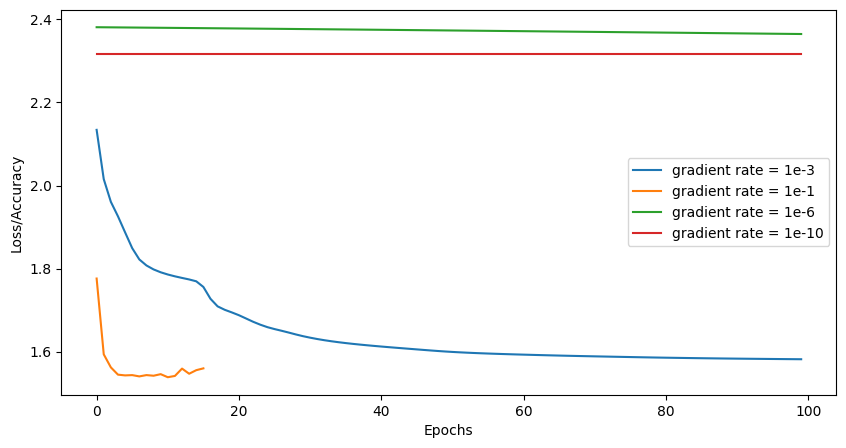

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(losses_CE, label='gradient rate = 1e-3')
plt.plot(losses_CE_2, label='gradient rate = 1e-1')
plt.plot(losses_CE_3, label='gradient rate = 1e-6')
plt.plot(losses_CE_4, label='gradient rate = 1e-10')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [21]:
input_size = alltrainx.shape[1]
output_size = 10

module_1 = Module_lineare(input_size, 128 , True)
module_2 = Module_lineare(128, output_size,True)

tan = TanH()
softmax = Softmax()

loss = CELoss()



network = Sequentiel([module_1,tan,module_2,softmax])


optimiser = Optim(network,loss,eps=1e-4)

losses_CE_6 = optimiser.SGD(alltrainx, alltrainy_onehot, 100, 100)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)


y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
accuracy :

In [23]:
input_size = alltrainx.shape[1]
output_size = 10

module_1 = Module_lineare(input_size, 128 , True)
module_2 = Module_lineare(128, output_size,True)

tan = TanH()
softmax = Softmax()

loss = CELoss()



network = Sequentiel([module_1,tan,module_2,softmax])


optimiser = Optim(network,loss,eps=1e-5)

losses_CE_7 = optimiser.SGD(alltrainx, alltrainy_onehot, 100, 100)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)


y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
accuracy :

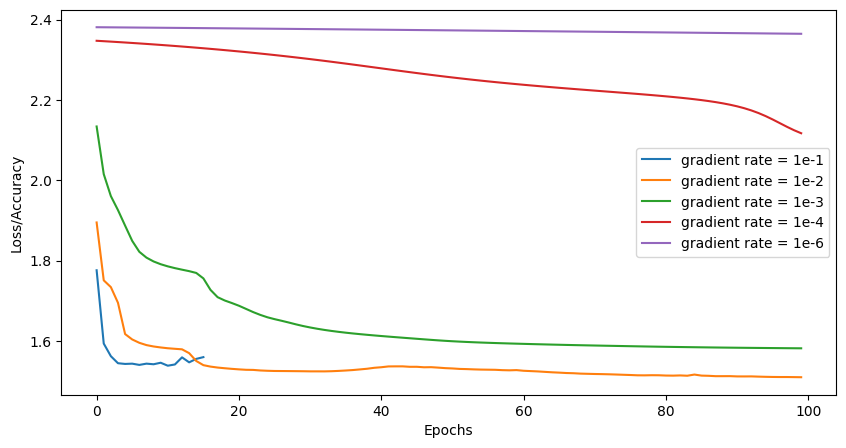

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(losses_CE_2, label='gradient rate = 1e-1')
plt.plot(losses_CE_5, label='gradient rate = 1e-2')
plt.plot(losses_CE, label='gradient rate = 1e-3')
plt.plot(losses_CE_6, label='gradient rate = 1e-4')
plt.plot(losses_CE_3, label='gradient rate = 1e-6')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [31]:
input_size = alltrainx.shape[1]
output_size = 10

module_1 = Module_lineare(input_size, 128 , True)
module_2 = Module_lineare(128, output_size,True)

sig = Sigmoide()
softmax = Softmax()

loss = CELoss()



network = Sequentiel([module_1,sig,module_2,softmax])


optimiser = Optim(network,loss,eps=1e-3)

losses_sig = optimiser.SGD(alltrainx, alltrainy_onehot, 100, 100)

y_pred = np.argmax(optimiser._net.forward(alltestx) , axis=1)


y_pred = y_pred.reshape(-1,1)
accuracy = np.sum(np.where(alltesty == y_pred, 1 , 0 )) / alltesty.shape[0]
print("accuracy : ",accuracy)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
accuracy :